In [1]:
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

import pandas as pd
import numpy as np

from os import path

from datetime import datetime
import itertools

import acquire 
import prepare

***1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method***

In [2]:
df = prepare.prepare_store_data()

In [3]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,nameofdayofweek,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,1,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,1,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,1,Tuesday,1,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,1,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,Tuesday,1,25.16


- aggregate to the daily level (`resample('D').sum()`)
- reset index(we need the index to represent row numbers for this method of splitting)
- set sale_amount to y
- set sale_date to X

In [4]:
df2 = df.sale_amount.resample('D').sum().reset_index()
df2.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


In [5]:
X = df2.sale_date
X.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [6]:
y = df2.sale_amount
y.head()

0    13696.0
1    13678.0
2    14488.0
3    15677.0
4    16237.0
Name: sale_amount, dtype: float64

In [7]:
tss = TimeSeriesSplit(n_splits = 5, max_train_size = None)
tss

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [13]:
help(tss)

Help on TimeSeriesSplit in module sklearn.model_selection._split object:

class TimeSeriesSplit(_BaseKFold)
 |  TimeSeriesSplit(n_splits='warn', max_train_size=None)
 |  
 |  Time Series cross-validator
 |  
 |  Provides train/test indices to split time series data samples
 |  that are observed at fixed time intervals, in train/test sets.
 |  In each split, test indices must be higher than before, and thus shuffling
 |  in cross validator is inappropriate.
 |  
 |  This cross-validation object is a variation of :class:`KFold`.
 |  In the kth split, it returns first k folds as train set and the
 |  (k+1)th fold as test set.
 |  
 |  Note that unlike standard cross-validation methods, successive
 |  training sets are supersets of those that come before them.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of splits. Must be at least 2.
 |  
 |      .. versionchanged:: 0.20
 |          ``n_spli

In [20]:
test = tss.split(X)

In [58]:
train_indices = []
test_indices = []
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_indices.append(train_index)
    test_indices.append(test_index)

In [61]:
train_indices[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [62]:
test_indices[0]

array([306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
       332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,
       371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
       384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
       397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
       436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
       462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
       475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 48

In [52]:
X_train.tail()

1517   2017-02-26 00:00:00+00:00
1518   2017-02-27 00:00:00+00:00
1519   2017-02-28 00:00:00+00:00
1520   2017-03-01 00:00:00+00:00
1521   2017-03-02 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [53]:
X_test.head()

1522   2017-03-03 00:00:00+00:00
1523   2017-03-04 00:00:00+00:00
1524   2017-03-05 00:00:00+00:00
1525   2017-03-06 00:00:00+00:00
1526   2017-03-07 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [54]:
X_test.tail()

1821   2017-12-27 00:00:00+00:00
1822   2017-12-28 00:00:00+00:00
1823   2017-12-29 00:00:00+00:00
1824   2017-12-30 00:00:00+00:00
1825   2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

***2. Validate your splits by plotting X_train and y_train***

In [63]:
X_train[train_indices[0]]

0     2013-01-01 00:00:00+00:00
1     2013-01-02 00:00:00+00:00
2     2013-01-03 00:00:00+00:00
3     2013-01-04 00:00:00+00:00
4     2013-01-05 00:00:00+00:00
5     2013-01-06 00:00:00+00:00
6     2013-01-07 00:00:00+00:00
7     2013-01-08 00:00:00+00:00
8     2013-01-09 00:00:00+00:00
9     2013-01-10 00:00:00+00:00
10    2013-01-11 00:00:00+00:00
11    2013-01-12 00:00:00+00:00
12    2013-01-13 00:00:00+00:00
13    2013-01-14 00:00:00+00:00
14    2013-01-15 00:00:00+00:00
15    2013-01-16 00:00:00+00:00
16    2013-01-17 00:00:00+00:00
17    2013-01-18 00:00:00+00:00
18    2013-01-19 00:00:00+00:00
19    2013-01-20 00:00:00+00:00
20    2013-01-21 00:00:00+00:00
21    2013-01-22 00:00:00+00:00
22    2013-01-23 00:00:00+00:00
23    2013-01-24 00:00:00+00:00
24    2013-01-25 00:00:00+00:00
25    2013-01-26 00:00:00+00:00
26    2013-01-27 00:00:00+00:00
27    2013-01-28 00:00:00+00:00
28    2013-01-29 00:00:00+00:00
29    2013-01-30 00:00:00+00:00
                 ...           
276   20

In [72]:
y_train[train_indicies[0]]

0      13696.0
1      13678.0
2      14488.0
3      15677.0
4      16237.0
5      17291.0
6      11769.0
7      13560.0
8      13878.0
9      14642.0
10     15633.0
11     16679.0
12     17741.0
13     11746.0
14     13625.0
15     13591.0
16     14587.0
17     15495.0
18     16294.0
19     17612.0
20     11709.0
21     13724.0
22     13613.0
23     14472.0
24     15640.0
25     16561.0
26     17579.0
27     11848.0
28     13724.0
29     13391.0
        ...   
276    22494.0
277    23892.0
278    25318.0
279    17034.0
280    19624.0
281    19519.0
282    21478.0
283    22409.0
284    23836.0
285    25438.0
286    16791.0
287    19615.0
288    19666.0
289    21081.0
290    22378.0
291    24083.0
292    25209.0
293    16765.0
294    19694.0
295    19642.0
296    21126.0
297    22530.0
298    23745.0
299    25247.0
300    16782.0
301    19700.0
302    19854.0
303    21085.0
304    24277.0
305    25569.0
Name: sale_amount, Length: 306, dtype: float64

In [74]:
X[test_indices[0]]

306   2013-11-03 00:00:00+00:00
307   2013-11-04 00:00:00+00:00
308   2013-11-05 00:00:00+00:00
309   2013-11-06 00:00:00+00:00
310   2013-11-07 00:00:00+00:00
311   2013-11-08 00:00:00+00:00
312   2013-11-09 00:00:00+00:00
313   2013-11-10 00:00:00+00:00
314   2013-11-11 00:00:00+00:00
315   2013-11-12 00:00:00+00:00
316   2013-11-13 00:00:00+00:00
317   2013-11-14 00:00:00+00:00
318   2013-11-15 00:00:00+00:00
319   2013-11-16 00:00:00+00:00
320   2013-11-17 00:00:00+00:00
321   2013-11-18 00:00:00+00:00
322   2013-11-19 00:00:00+00:00
323   2013-11-20 00:00:00+00:00
324   2013-11-21 00:00:00+00:00
325   2013-11-22 00:00:00+00:00
326   2013-11-23 00:00:00+00:00
327   2013-11-24 00:00:00+00:00
328   2013-11-25 00:00:00+00:00
329   2013-11-26 00:00:00+00:00
330   2013-11-27 00:00:00+00:00
331   2013-11-28 00:00:00+00:00
332   2013-11-29 00:00:00+00:00
333   2013-11-30 00:00:00+00:00
334   2013-12-01 00:00:00+00:00
335   2013-12-02 00:00:00+00:00
                 ...           
580   20

In [75]:
y[test_indicies[0]]

306    27266.0
307    18215.0
308    21255.0
309    21044.0
310    22521.0
311    24466.0
312    25864.0
313    27191.0
314    18375.0
315    21249.0
316    21174.0
317    22555.0
318    24262.0
319    25710.0
320    27248.0
321    18251.0
322    21276.0
323    21413.0
324    22566.0
325    24461.0
326    25820.0
327    27319.0
328    18260.0
329    21145.0
330    21306.0
331    22574.0
332    24308.0
333    25703.0
334    19357.0
335    13141.0
        ...   
580    22345.0
581    26079.0
582    26257.0
583    27901.0
584    29827.0
585    31695.0
586    33779.0
587    22391.0
588    26083.0
589    26014.0
590    28076.0
591    29659.0
592    31769.0
593    33894.0
594    22459.0
595    26039.0
596    26100.0
597    27962.0
598    29512.0
599    31607.0
600    33539.0
601    22324.0
602    26317.0
603    26085.0
604    27809.0
605    29959.0
606    31719.0
607    33611.0
608    20772.0
609    24341.0
Name: sale_amount, Length: 304, dtype: float64

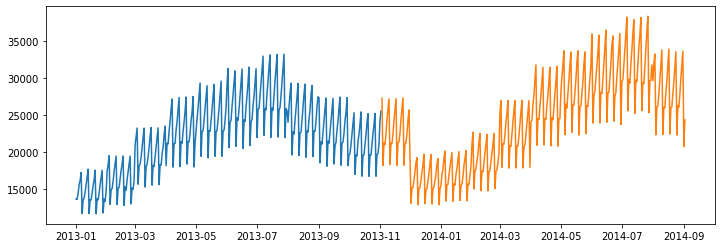

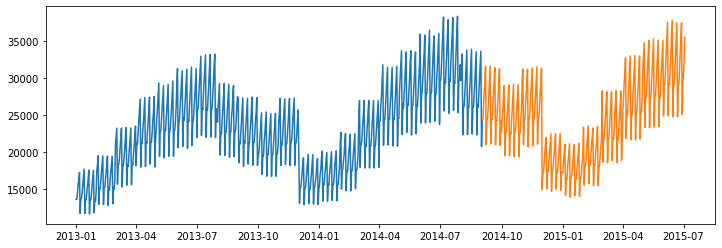

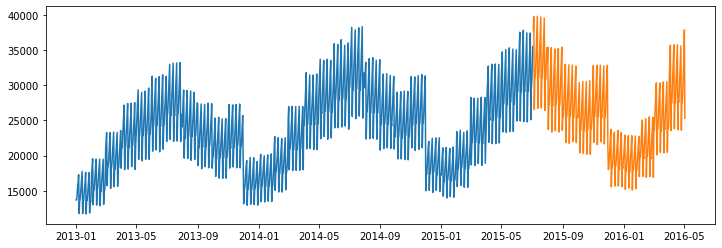

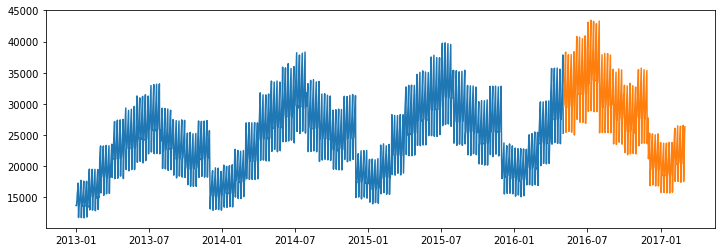

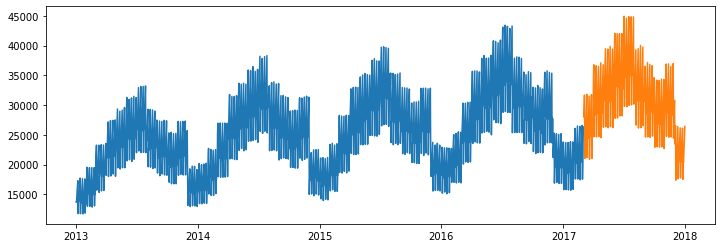

In [84]:
for i in range(0,5):
    plt.figure(figsize = (12,4))
    plt.plot(X_train[train_indices[i]], y_train[train_indices[i]])
    plt.plot(X[test_indices[i]], y[test_indices[i]])
    

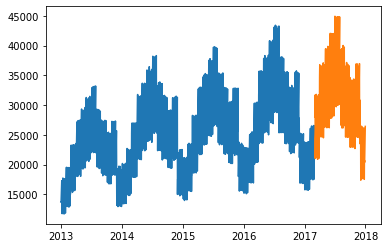

In [85]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)

***3. Plot the weekly average & the 7-day moving average. Compage the 2 plots***

In [86]:
train = df.resample('D').sum()[:len(X_train)]
train

,item_id,sale_amount,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,month,dayofweek,sales_total
sale_date,,,,,,,,,,,
2013-01-01 00:00:00+00:00,12750,13696.0,227794000,2750,2580.2,119234392245520,119234392245520,39112400,500,500,73844.01
2013-01-02 00:00:00+00:00,12750,13678.0,227794500,2750,2580.2,119234392245520,119234392245520,39112400,500,1000,73570.58
2013-01-03 00:00:00+00:00,12750,14488.0,227795000,2750,2580.2,119234392245520,119234392245520,39112400,500,1500,78169.48
2013-01-04 00:00:00+00:00,12750,15677.0,227795500,2750,2580.2,119234392245520,119234392245520,39112400,500,2000,84467.73
2013-01-05 00:00:00+00:00,12750,16237.0,227796000,2750,2580.2,119234392245520,119234392245520,39112400,500,2500,87621.85
2013-01-06 00:00:00+00:00,12750,17291.0,227796500,2750,2580.2,119234392245520,119234392245520,39112400,500,3000,93093.85
2013-01-07 00:00:00+00:00,12750,11769.0,227797000,2750,2580.2,119234392245520,119234392245520,39112400,500,0,63777.54
2013-01-08 00:00:00+00:00,12750,13560.0,227797500,2750,2580.2,119234392245520,119234392245520,39112400,500,500,72994.66
2013-01-09 00:00:00+00:00,12750,13878.0,227798000,2750,2580.2,119234392245520,119234392245520,39112400,500,1000,75133.92


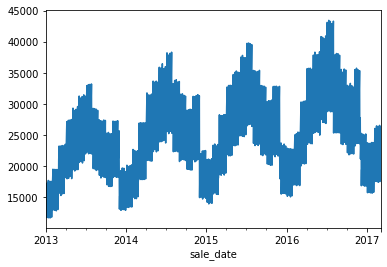

In [88]:
train.sale_amount.plot()

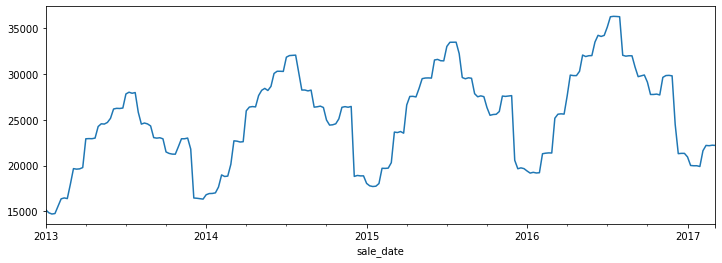

In [89]:
train.sale_amount.resample('W').mean().plot(figsize=(12,4))

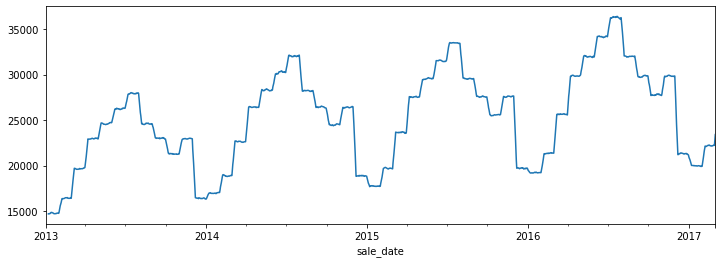

In [90]:
train.sale_amount.rolling(7).mean().plot(figsize=(12,4))

***4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.***

In [ ]:
train.diff(periods=1).plot(figsize=(16,4))

In [ ]:
decompostition = sm.tsa.seasonal_decompose(train.sale_amount.resample('W').mean(), model = 'additive')



In [ ]:
fig = decompostition.plot()

In [ ]:
pd.plotting.lag_plot(train.sale_amount.resample('W').mean(), lag=1)

In [ ]:
df_corr = pd.concat([train.sale_amount.shift(1),train.sale_amount],axis=1)
df_corr

In [ ]:
df_corr.columns = ['t-1','t+1']

In [ ]:
df_corr.corr()